In [ ]:
# PCA(Principal Component Analysis)

# 차원축소 : 중요변수만 선택 or 새 변수를 추출
# 변수 선택: 기존 변수중 선택 (변수 해석용이, 변수간 상관관계 고려가 어려움)
# 변수 추출: 기존 변수들의 변환을 통해 새 변수 생성(변수 해석 어려움, 변수간 상관관계 고려 용이)

# Supercised Learning에서 변수 추출과 생성
# Unsupervised Learning에서 변수 생성 => PCA 기법
# 비지도 학습에서 변수 생성 (변수 추출은 PCA Loading이라는 기법이 존재)

# 주성분 분석
# 고차원 데이터를 효과적으로 분석하기 위한 기법
# 차원축소의 원리를 이용해 시각화, 군집화 진행
# 전체 분석중 초기과정에 사용, 데이터를 이해하거나 
# 데이터의 변수를 줄여 효율적인 모델링을 위한용도로 사용

# 특성 X1 ~ Xn의 상관관계를 고려한 새 변수 Zp 생성
# Z1 ~ Zp = (a_1X + .... a_nXn)의 선형결합

# 데이터간 분산이 가장 큰 축 선택

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split

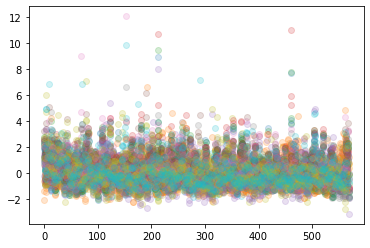

Original Data Shape:  (569, 30)
PCA Data Shape:  (569, 2)
X_train
 -1.794120407794253e-12
X_pca
 [[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]
 ...
 [ 1.25617928 -1.90229671]
 [10.37479406  1.67201011]
 [-5.4752433  -0.67063679]]
PCA_component
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.1

In [37]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(cancer.data)

plt.plot(X_train,'o',alpha=0.2)
plt.show()
# print(np.sum(X_train[1,:]))

from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # 주성분이 2개인 PCA 모델 제작
pca.fit(X_train)

X_pca = pca.transform(X_train)
print("Original Data Shape: ",str(X_train.shape))
print("PCA Data Shape: ", str(X_pca.shape))

print("X_train\n",np.sum(X_train[:,0]))
print("X_pca\n",X_pca)
print("PCA_component\n",pca.components_)

print("Sum",np.sum(X_train[0,:]*pca.components_[0])) # sum(Data * pca.component) = PCA data가 됨을 확인
print(pca.components_.shape)

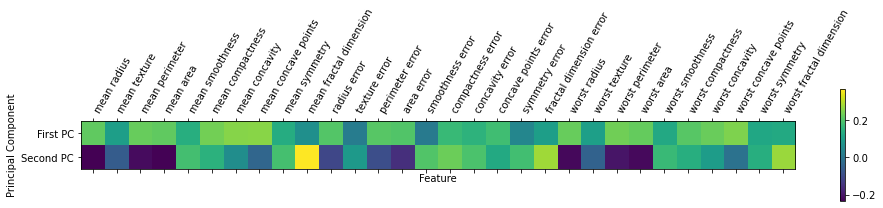

In [49]:
# pca.component (PCA 주성분)은 각각의 중요도를 의미
# 중요도 시각화
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1],["First PC","Second PC"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=60,ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal Component")
plt.show()

# => 첫번째 주성분: 모두 양수임을 확인, 이로써 모든 특성사이의 공통의 상호관계가 있음을 짐작할 수 있다. (한 특성이 커지면 다른 특성도 커질 가능성이 높다)
# => 반면 두번째 주성분은 음수가 섞여있어 상호관계를 파악하기 어렵다.

In [9]:
# 특성추출 실습

from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

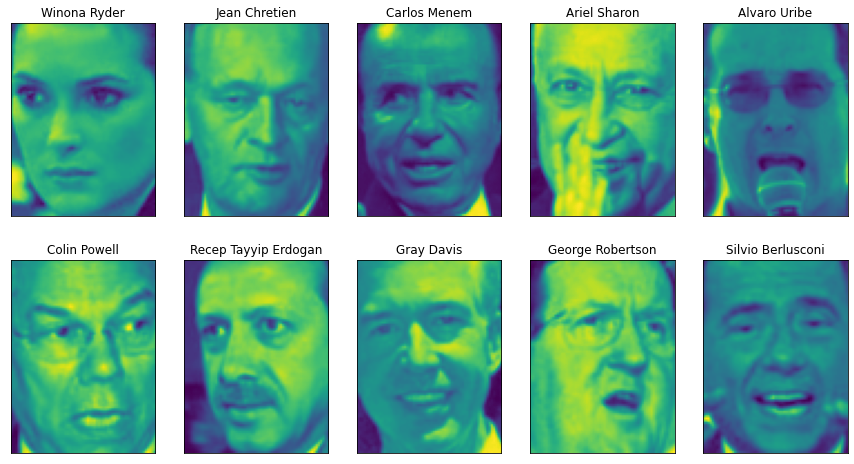

In [10]:
fig ,axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])


In [11]:
print("people image shape: ",people.images.shape) # 3023개의 87 x 65 픽셀의 이미지
print("클래스 개수: ",len(people.target_names))

people image shape:  (3023, 87, 65)
클래스 개수:  62


In [12]:
counts = np.bincount(people.target) # 0~가장큰수의 빈도수를 출력 [0번빈도수, 1번빈도수 ~ 62번빈도수]
# print(people.target)
# print(counts)
# print(people.target_names)
for i, (count,name) in enumerate(zip(counts, people.target_names)): # n번째 사람과 n번째 빈도수 묶기
    print("{0:25} {1:3}".format(name,count),end="  ") #end 값 설정
    if (i+1)%3 == 0:
        print() #3개마다 줄바꿈
    
# 조지부시위 콜린파워의 데이터 갯수가 많은것을 확인


Alejandro Toledo           39  Alvaro Uribe               35  Amelie Mauresmo            21  
Andre Agassi               36  Angelina Jolie             20  Ariel Sharon               77  
Arnold Schwarzenegger      42  Atal Bihari Vajpayee       24  Bill Clinton               29  
Carlos Menem               21  Colin Powell              236  David Beckham              31  
Donald Rumsfeld           121  George Robertson           22  George W Bush             530  
Gerhard Schroeder         109  Gloria Macapagal Arroyo    44  Gray Davis                 26  
Guillermo Coria            30  Hamid Karzai               22  Hans Blix                  39  
Hugo Chavez                71  Igor Ivanov                20  Jack Straw                 28  
Jacques Chirac             52  Jean Chretien              55  Jennifer Aniston           21  
Jennifer Capriati          42  Jennifer Lopez             21  Jeremy Greenstock          24  
Jiang Zemin                20  John Ashcroft              53

In [13]:
# 조지부시와 콜린파월에 치중된 특성을 추출하지 않도록 갯수를 사람당 50개로 제한함
mask = np.zeros(people.target.shape, dtype=np.bool) #0으로 가득찬 array 생성
# print(np.unique(people.target))
for target in np.unique(people.target): # 중복없이 출력 (0~61)
    mask[np.where(people.target==target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]


# ----- 50개 제한된 것을 확인 가능 ------
counts = np.bincount(y_people) 
for i, (count,name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name,count),end="  ") 
    if (i+1)%3 == 0:
        print()

# 스케일조정
X_people = X_people / 255

Alejandro Toledo           39  Alvaro Uribe               35  Amelie Mauresmo            21  
Andre Agassi               36  Angelina Jolie             20  Ariel Sharon               50  
Arnold Schwarzenegger      42  Atal Bihari Vajpayee       24  Bill Clinton               29  
Carlos Menem               21  Colin Powell               50  David Beckham              31  
Donald Rumsfeld            50  George Robertson           22  George W Bush              50  
Gerhard Schroeder          50  Gloria Macapagal Arroyo    44  Gray Davis                 26  
Guillermo Coria            30  Hamid Karzai               22  Hans Blix                  39  
Hugo Chavez                50  Igor Ivanov                20  Jack Straw                 28  
Jacques Chirac             50  Jean Chretien              50  Jennifer Aniston           21  
Jennifer Capriati          42  Jennifer Lopez             21  Jeremy Greenstock          24  
Jiang Zemin                20  John Ashcroft              50

In [14]:
# 데이터 이해하기

print("People data Keys :",people.keys())
#print(people.DESCR)
# 이미지 정보를 담고있는 image, x값에 해당하는 data, y값 target을 가지고있다.
# feature_names 속성은 보이지 않는다.
# 각 속성이 어떤것인지 모르겠다.

print("원본데이터: ",people.data.shape)
print("조정된 데이터",X_people.shape) # 특성이 5655개?
print("조정된 결과값: ",y_people.shape) # 2063개

# 가장 간단한 KNN으로 구현

from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train) # 이웃 1개로 학습
print("KNN Accuracy: {:.2f}".format(knn.score(X_test, y_test)))

# 정확도가 28% 밖에 되지않는다.

from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(max_iter=500).fit(X_train, y_train)
print("Linear Accuracy: ", lg.score(X_test, y_test))

# 로지스틱 분류기를 사용할때는 59%, 이 마저도 분석시간이 오래걸려 요구되는 max_iter 값을 충족시키지 못했다. 

People data Keys : dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])
원본데이터:  (3023, 5655)
조정된 데이터 (2063, 5655)
조정된 결과값:  (2063,)
KNN Accuracy: 0.28
Linear Accuracy:  0.5949612403100775


C:\Users\wlsgh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# PCA를 사용
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("PCA shape: ",X_train_pca.shape) #2063 개의 75% 1547의 데이터와 특성 100개로 바뀜
# 특성이 5600개 수준에서 특성들의 상관관계를 고려하여 가장 영향력있는 100개의 특성으로 간소화 되었다.

PCA shape:  (1547, 100)


In [20]:
# 다시 선형분류모델에 적용해보자
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(max_iter=500).fit(X_train_pca, y_train)
print("Linear Accuracy: {:.2f}".format(lg.score(X_test_pca, y_test)))
# 왜 인지 모르겠지만 성능이 9% 하락했다.

# KNN 모델에 적용
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1).fit(X_train_pca, y_train) # 이웃 1개로 학습
print("KNN Accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))
# knn은 성능이 5% 상승했다.

# 딥러닝 사용
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=[100,100],random_state=0).fit(X_train_pca, y_train)
print("MLP Accuracy: {:.2f}".format(mlp.score(X_test_pca,y_test)))

Linear Accuracy: 0.51
KNN Accuracy: 0.33
MLP Accuracy: 0.51


pca component: (100, 5655)


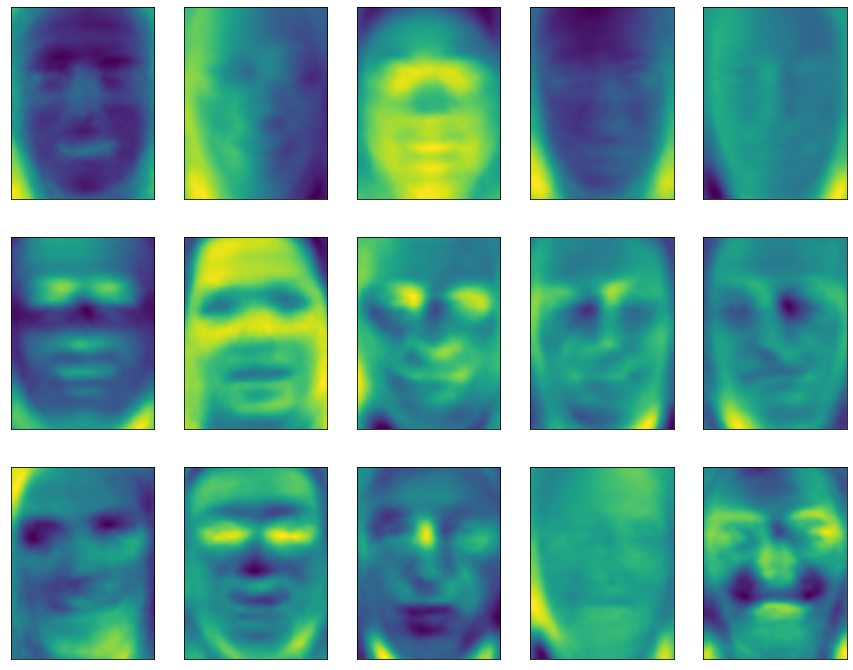

In [27]:
# 추출된 특성(주성분)들 확인
print("pca component:", pca.components_.shape) #100개 기존 특성 X에 대한 선형식으로 100개 가 존재

fig, axes = plt.subplots(3,5,figsize=(15,12),subplot_kw= {'xticks':(), 'yticks':()})

for i, (component, ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')

# 쉽게 특성을 파악할 순 없지만 새로운 특성이 생성된것을 확인할 수 있다.
# 예를들어 1번은 얼굴과 배경의 명암차이, 2번은 왼쪽과 오른쪽의 명암차이등을 발견